#**Laboratorio di Introduzione alla Matematica Computazionale - Esercizi in Julia**

##**Esercitazione 3: Sistemi di funzioni iterate e frattali**

---
# Setup iniziale
Carichiamo le librerie necessarie.

In [4]:
using Plots
using LinearAlgebra

---
#1. Fern Fractal (Felce di Barnsley)

Il *fern fractal*, o *felce di Barnsley*, è un insieme frattale così chiamato perchè prende la forma di una foglia di felce. Si ottiene disegnando una successione di punti del piano generati tramite un processo casuale che ora descriviamo.

Rappresenteremo un punto sul piano per mezzo del vettore ${\bf x}\in\mathbb{R}^2$ delle sue coordinate. La successione che definisce il *fern fractal* è generata applicando successivamente delle trasformazioni affini del tipo

$$
{\bf x}\rightarrow A_i{\bf x}+{\bf b}_i,
$$

dove $A_i$ è una matrice $2\times 2$ e ${\bf b}_i$ un vettore di dimensione $2$. Nella costruzione del *fern fractal* si usano quattro diverse trasformazioni di questo tipo, ciascuna scelta con una certa probabilità. Cominciamo studiando la prima di queste trasformazioni, quella che viene scelta con maggiore probabilità. Essa è definita da

$$
A_1=\left[\begin{array}{cc}
0.85&0.04\\-0.04&0.85
\end{array}\right],\qquad
{\bf b}_1=\left[\begin{array}{c}0\\1.6
\end{array}\right].
$$

L'effetto di questa trasformazione è di ruotare e ``accorciare'' il vettore ${\bf x}$, e poi aggiungere 1.6 alla seconda componente. L'applicazione ripetuta di questa trasformazione costruisce tante copie sempre più piccole delle foglie e del gambo della felce.


**Esercizio 1**. Scegliamo
${\bf x}=\left[1,1\right]^T$. Scrivere un codice Juilia che applichi 50 volte la trasformazione definita sopra e disegni sul piano tutti i punti ottenuti.<br>
(Suggerimento: anzichè usare il comando `plot` ogni volta che si calcola un nuovo punto, è preferibile memorizzare dapprima tutti i punti calcolati in un array `S` di dimensioni $2\times 50$, e poi disegnarli con il comando ` plot(S(1,:),S(2,:),'g.')`).  

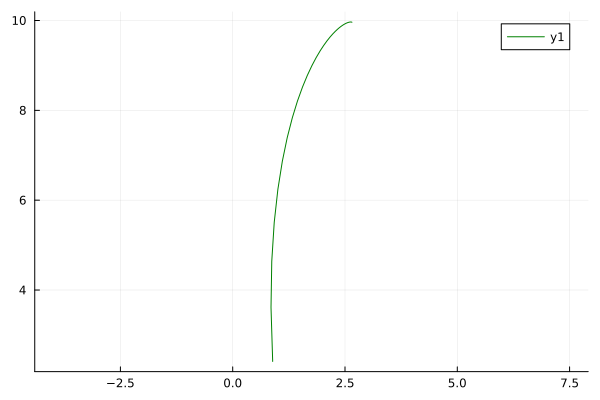

In [5]:
A1 = [0.85 0.04; -0.04 0.85]; b1 = [0; 1.6]
x = [1.0; 1.0];
S = zeros(2, 50)
for k in 1:50
    x = A1 * x + b1
    S[:, k] = x
end
plot(S[1,:], S[2,:], color=:green, aspect_ratio=:equal)

Esercizio 1 & 2: Trasformazioni Singole

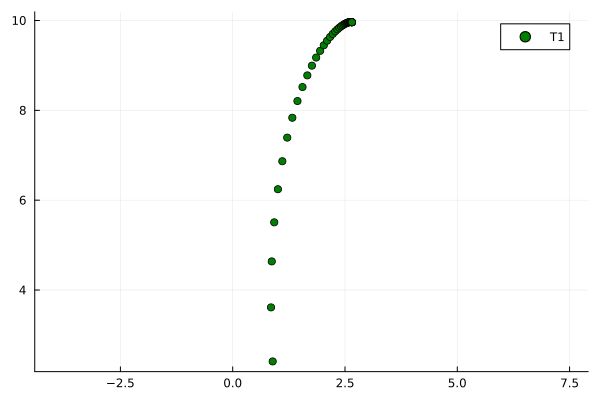

In [ ]:
using Plots

# Definizioni delle matrici e dei vettori
A1 = [0.85 0.04; -0.04 0.85]; b1 = [0; 1.6]
A2 = [0.20 -0.26; 0.23 0.22]; b2 = [0; 1.6]
A3 = [-0.15 0.28; 0.26 0.24]; b3 = [0; 0.44]
A4 = [0 0; 0 0.16];           b4 = [0; 0]

function apply_transform(A, b, iterations, x_start=[1.0; 1.0])
    S = zeros(2, iterations)
    x = x_start
    for k in 1:iterations
        x = A * x + b
        S[:, k] = x
    end
    return S
end

# Esempio per la prima trasformazione (Esercizio 1)
S1 = apply_transform(A1, b1, 50)
scatter(S1[1,:], S1[2,:], color=:green, label="T1", aspect_ratio=:equal)

Esercizio 3: La Funzione fern(m)

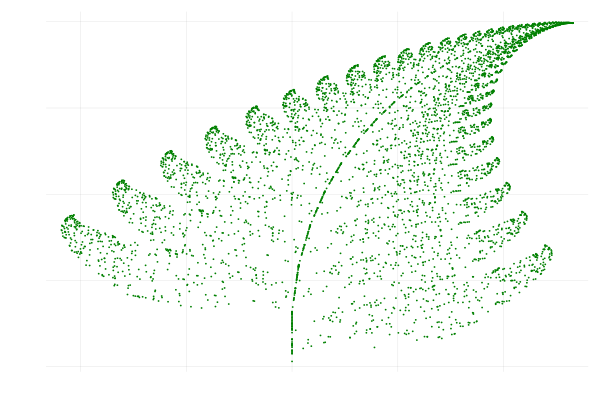

In [ ]:
function fern(m)
    x = [0.5; 0.5] # Punto iniziale [cite: 30]
    S = zeros(2, m)

    # Probabilità cumulative [cite: 29, 31, 32]
    p = [0.85, 0.92, 0.99, 1.0]

    for k in 1:m
        r = rand() # Numero casuale in [0, 1] [cite: 39]

        if r <= p[1]
            x = A1 * x + b1
        elseif r <= p[2]
            x = A2 * x + b2
        elseif r <= p[3]
            x = A3 * x + b3
        else
            x = A4 * x + b4
        end
        S[:, k] = x
    end

    scatter(S[1,:], S[2,:], markersize=1, markerstrokewidth=0,
            color=:green, legend=false, axis=false) # axis off [cite: 41]
end

# Esecuzione per m=5000 [cite: 42]
fern(5000)

In [ ]:
2. Triangolo di Sierpinski

Esercizio 6: La Funzione \texttt{fract(C, m)}

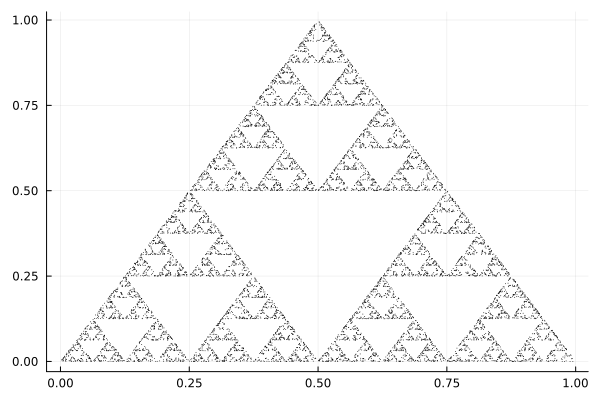

In [ ]:
function fract(C, m)
    n = size(C, 1) ÷ 2 # Numero di trasformazioni [cite: 53]

    # Calcolo dei determinanti e delle probabilità [cite: 55, 57, 58]
    dets = zeros(n)
    for j in 1:n
        idx = (2*j-1):(2*j)
        dets[j] = abs(det(C[idx, 1:2]))
    end

    dets = max.(dets, maximum(dets)/(25*n))
    dets = dets ./ sum(dets)

    # Vettore p per la selezione cumulativa [cite: 59, 60]
    p = [0.0; cumsum(dets[1:end-1])]

    x = rand(2)
    points = zeros(2, m)

    for k in 1:(20 + m)
        r = rand()
        i = sum(p .< r) # Selezione dell'indice [cite: 62]

        idx = (2*i-1):(2*i)
        A_i = C[idx, 1:2]
        b_i = C[idx, 3]
        x = A_i * x + b_i

        if k > 20
            points[:, k-20] = x
        end
    end

    scatter(points[1,:], points[2,:], markersize=0.5,
            markerstrokewidth=0, color=:black, legend=false)
end

# Matrice S per il Triangolo di Sierpinski [cite: 70]
S_mat = [0.5 0 0; 0 0.5 0; 0.5 0 0.5; 0 0.5 0; 0.5 0 0.25; 0 0.5 0.5]
fract(S_mat, 10000)

3. The chaos game

Esercizio 7: La Funzione chaos(m)

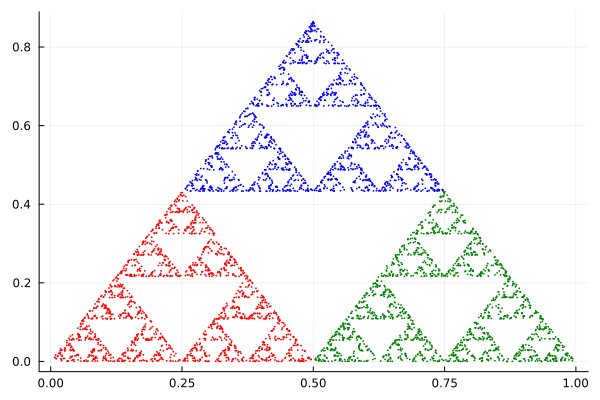

In [ ]:
function chaos(m)
    # Vertici del triangolo equilatero [cite: 76]
    vertices = [0.0 1.0 0.5; 0.0 0.0 sqrt(3)/2]
    colors = [:red, :green, :blue]

    x = rand(2)
    points = zeros(2, m)
    pt_colors = Vector{Symbol}(undef, m)

    for k in 1:(20 + m)
        dice = rand(1:6) # Dado a 6 facce [cite: 79]

        if dice in [1, 2]
            target_idx = 1 # Rosso
        elseif dice in [3, 4]
            target_idx = 2 # Verde
        else
            target_idx = 3 # Blu
        end

        # Muovi verso il vertice scelto (metà distanza) [cite: 79, 81]
        x = (x + vertices[:, target_idx]) / 2

        if k > 20
            points[:, k-20] = x
            pt_colors[k-20] = colors[target_idx] # Per l'esercizio "colori diversi" [cite: 85]
        end
    end

    # Disegna con i colori associati ai vertici
    scatter(points[1,:], points[2,:], color=pt_colors,
            markersize=1, markerstrokewidth=0, legend=false)
end

chaos(5000)